# Introduction

The Lotka-Volterra population model is a system of differential equations used to model predator-prey relationships in nature. The basic feature of the model is the periodic relationship between the two populations as they compete to reproduce and survive. In this project I present a discrete cellular automata which approximately obeys the Lotka-Volterra equations and show why this relationship exists based on the design of the model. Furthermore I (will) estimate the model parameters using statistical methods.

# Methods

Our population model takes place on a finite simple graph $G=(V,E)$ usually taken to be a rectangular array. To each vertex $v\in V$ we assign a state $X(v)$ consisting of a *type*, either empty, prey, or predator, and a positive integer *count* if the type is prey or predator. The state of the overall system is a function $X$ from the vertex set $V$ to the set of states:

$$X:V\rightarrow\{\texttt{empty},\texttt{prey},\texttt{pred}\}\oplus\mathbb\{0,1,2,3,\dots\}$$

The system evolves over time by a stochastic evolution function which depends on the current state $X$ and three model parameters describing the reproductive rates of each species.



$\text{$\textbf{Algorithm 1:}$ Population state transition function}$  
$\textbf{Input: }\text{Population state $\{X_t(v):v\in V\}$ and model parameters $(\texttt{prey}_\texttt{growthrate},\texttt{pred}_\texttt{growthrate},\texttt{pred}_\texttt{deathrate})$}$  
$\text{$\textbf{Output: }\text{Updated population state }\{X_{t+1}(v):v\in V\}$}$

$01:\text{Initialize }X_{t+1}(v)\leftarrow 0\text{ for every vertex }v$  
$02:$ 
$02:\textbf{For each }\text{vertex }v\textbf{ do}$  
$15:\quad\textbf{If }X_t(v)\text{ is prey }\textbf{then}$  
$04:\quad\quad\text{Let }\#\texttt{prey}\text{ be the number of prey at }X_t(v)$  
$04:\quad\quad\text{Sample }\texttt{prey}_\texttt{growth}\leftarrow\texttt{Binomial}(n=\#\texttt{prey},p=\texttt{prey}_\texttt{growthrate})$  
$06:\quad\quad\textbf{For }i=1\textbf{ to }\#\texttt{prey}+\texttt{prey}_\texttt{growth}\textbf{ do}$  
$07:\quad\quad\quad\text{Sample $v_\text{next}$ uniformly from the neighborhood of $v$}$  
$08:\quad\quad\quad\text{Increment the number of prey at $X_{t+1}(v_\text{next})$}$  
$09:$  
$09:\textbf{For each }\text{vertex }v\textbf{ do}$  
$15:\quad\textbf{If }X_t(v)\text{ is predator }\textbf{then}$  
$10:\quad\quad\text{Let }\#\texttt{pred}\text{ be the number of predators at }X_t(v)$  
$11:\quad\quad\text{$\text{Sample }\texttt{pred}_\texttt{death}\leftarrow\texttt{Binomial}(n=\#\texttt{pred},p=\texttt{pred}_\texttt{deathrate})$}$  
$13:\quad\quad\text{$\textbf{For }i=1\textbf{ to }\#\texttt{pred}-\texttt{pred}_\texttt{death}\textbf{ do}$}$  
$14:\quad\quad\quad\text{Sample $v_\text{next}$ uniformly from the neighborhood of $v$}$  
$15:\quad\quad\quad\text{$\textbf{If }X_{t+1}(v_\text{next})\text{ is prey }\textbf{then}$}$  
$16:\quad\quad\quad\quad\text{Let }\#\texttt{prey}\text{ be the number of prey at }X_{t+1}(v_\text{next})$  
$17:\quad\quad\quad\quad\text{$\text{Sample }\texttt{pred}_\texttt{growth}\leftarrow\texttt{Binomial}(n=\#\texttt{prey},p=\texttt{pred}_\texttt{growthrate})$}$  
$18:\quad\quad\quad\quad\text{Remove all prey from }X_{t+1}(v_\text{next})$  
$18:\quad\quad\quad\quad\text{Set the number of predators at }X_{t+1}(v_\text{next})\text{ to }\texttt{pred}_\text{growth}$  
$19:\quad\quad\quad\text{Increment the number of predators at }X_{t+1}(v_\text{next})$  
$20:$  
$20:\textbf{Return }\{X_{t+1}(v):v\in V\}$  


Because the growth, death, and movement of the organisms are random, the sequence obtained by iteratively applying the state transition function to is a Markov process. To plot the results of such a process we define the *population measure* $\mu(X_t)$ to be an ordered pair $(x_t,y_t)$ containing the total population of each species. Based on the design of the model, we derive the following difference equations:

$$\mathbb E[x_{t+1}] = (1+\texttt{prey}_\texttt{growthrate})x_t - k_1x_ty_t$$  
$$\mathbb E[y_{t+1}] = (1-\texttt{pred}_\texttt{deathrate})y_t + k_2x_ty_t$$

# Results


LVCA done


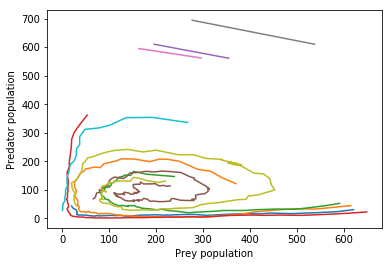

In [18]:
prey_growthrate = .1
pred_growthrate = .5
pred_deathrate  = .1
LVCA(dim = (25, 25),
     params = (prey_growthrate, pred_growthrate, pred_deathrate),
     trials = 10, duration = 100)

# Code

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

def iterate(Grid, state, params):
	
	dim = Grid.shape
	(prey_growthrate, pred_growthrate, pred_deathrate) = params
	(prey, pred) = state
	(prey_Grid, pred_Grid) = (np.zeros(dim), np.zeros(dim))
	
	# Step 1: Each prey moves randomly and may reproduce.
	for (index, cell) in np.ndenumerate(Grid):
		if cell > 0:
			for i in range(int(cell)):
				step = np.random.randint(-1, 2, size = np.size(dim))
				index_next = tuple((index + step) % dim)
				prey_Grid[index_next] += 1
				if np.random.random() < prey_growthrate:
					prey_Grid[index_next] += 1
					prey += 1

	# Step 2: Each predator either dies or moves randomly. If destination contains prey, then predator may reproduce.
	for (index, cell) in np.ndenumerate(Grid):
		if cell < 0:
			for i in range(int(-cell)):
				if np.random.random() < pred_deathrate:
					pred -= 1
				else:
					step = np.random.randint(-1, 2, size = np.size(dim))
					index_next = tuple((index + step) % dim)
					pred_Grid[index_next] += -1
					if prey_Grid[index_next] > 0:
						for j in range(int(prey_Grid[index_next])):
							if np.random.random() < pred_growthrate:
								pred_Grid[index_next] += -1
								pred += 1
						prey -= prey_Grid[index_next]
						prey_Grid[index_next] = 0
	
	Grid_next = prey_Grid + pred_Grid
	state_next = (prey, pred)
	return (Grid_next, state_next)

def Grid_init(dim, state_init):

	Grid = np.zeros(dim)
	(prey_init, pred_init) = state_init
	(prey, pred) = (0, 0)
	
	while prey < prey_init:
		index = tuple(np.random.randint(0, np.prod(dim), size = np.size(dim)) % dim)
		Grid[index] += 1
		prey += 1
	while pred < pred_init:
		index = tuple(np.random.randint(0, np.prod(dim), size = np.size(dim)) % dim)
		if Grid[index] <= 0:
			Grid[index] += -1 
			pred += 1
			
	return Grid

def compute_Orbit(dim, params, state_init, duration, trial = 0, trials = 1):
	Orbit = [state_init]
	Grid = Grid_init(dim, state_init)
	state = state_init
	
	for i in range(duration):
		(Grid, state) = iterate(Grid, state, params)
		Orbit.append(state)
		if 0 in state or sum(state) > np.prod(dim):
			return Orbit
	
	return Orbit

def LVCA(dim, params, trials, duration, prey_domain = (0, 1), pred_domain = (0, 1)):
	
	for trial in range(trials):
		state_init = (np.prod(dim)*np.random.uniform(*np.transpose([prey_domain, pred_domain]))).astype(int)
		Orbit = compute_Orbit(dim, params, state_init, duration, trial, trials)

		plt.plot(*np.transpose(Orbit))

	print('\nLVCA done')
	plt.xlabel('Prey population')
	plt.ylabel('Predator population')
	plt.show()
	return